# Projeto Eletromagnetismo e Ondulatória

# Freio Magnético

## Modelagem:

<img src="modelo.png" width="650">

In [660]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [661]:
def forca(w, B):
    F = (w*r*(B^2)*(a^2))/p
    return F

In [662]:
def torque (w, B):
    T = -(w*(r^2)*(a^2)*(B^2))/p
    return p

In [663]:
# Para os calculos, utilizei as formulas desse artigo:
# https://www.researchgate.net/publication/265088196_Braking_Torque_Analysis_On_Electromagnetic_Braking_Study_Using_Eddy_Current_For_Brake_Disc_Of_Al6061_And_Al7075
# Encontrei essas formulas em varios outros artigos então podem estar corretas. Se não me engano são as mesmas
# formulas listadas na imagem

In [664]:
# CONSTANTES:
# REVER ESSES VALORES:
conductivity_aluminium=2.73*(10**7)
resistivity_aluminium = 1/conductivity_aluminium
#massa do disco
m=1
#Volume
S= math.pi * 0.04**2
d = 0.03/100
V= S*d
#distancia do centro do disco até o campo magnetico
R=5/100
# w inicial
w=800
# Momento de inercia de um disco (para calcular a aceleração a partir do torque)
I = m*R**2

In [665]:
#Campo magnetico
#B=u0*n*i/Ig
B= 0.02

In [666]:
# Corrente induzida
J= conductivity_aluminium*(R*w*B)
print (J)

21840000.0


In [667]:
# Potencia dissipada
Pd= resistivity_aluminium*(J**2)*V
print (Pd)

26.347155284890015


In [668]:
# Torque de frenagem (Tb)
Tb= Pd/w
print (Tb)

0.03293394410611252


In [669]:
# aceleração angular
a_angular = Tb/I
print (a_angular)

13.173577642445006


In [670]:
delta_t=1e-3
lista_v=[]
lista_a=[]
listatempo= np.arange(0,300,delta_t)
w0= w

# ACREDITO QUE DESSA FORMA TA ERRADO. Veja com o odeint
# for i in listatempo:
    
#     J= conductivity_aluminium*(R*w0*B)
#     Pd= resistivity_aluminium*(J**2)*V
#     Tb= Pd/w0
#     a_angular= Tb/I
#     w0 = w0-a_angular
#     v= w0*R
#     lista_v.append(v)
#     lista_a.append(a_angular*R)
# plt.plot(listatempo,lista_v,'b',label='Velocidade')
# plt.plot(listatempo,lista_a,'r',label='Aceleração')
# plt.title("Velocidade do disco ao longo do tempo")
# plt.xlabel("Tempo(s)")
# plt.ylabel("Velocidade(m/s)")
# plt.legend()
# plt.grid(True)
# plt.show()

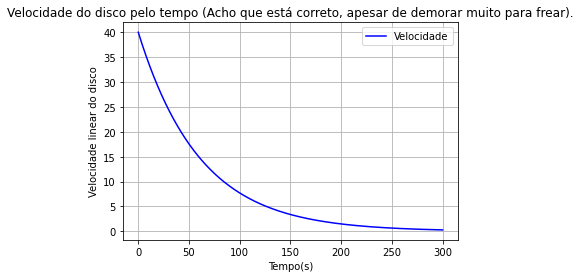

In [671]:
#POR ODEINT
#implementando a função EquacoesDiferenciais
def derivadas(condicao_inicial,t,R,conductivity_aluminium,B,V):
    w= condicao_inicial
    J= conductivity_aluminium*(R*w*B)
    Pd= resistivity_aluminium*(J**2)*V
    Tb= Pd/w
    a_angular= Tb/I
    dt1dt= -a_angular
    return dt1dt

Solucao= odeint(derivadas, 800, listatempo,args=(R,conductivity_aluminium,B,V))
velocidade = Solucao*R
plt.plot(listatempo, velocidade,'b',label='Velocidade')
plt.title("Velocidade do disco pelo tempo (Acho que está correto, apesar de demorar muito para frear).")
plt.xlabel("Tempo(s)")
plt.ylabel("Velocidade linear do disco")
plt.legend()
plt.grid(True)
plt.show()